<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio de Feature Scaling

Continuando con nuestro proyecto en AutoRenew, la empresa de coches de segunda mano, en este laboratorio abordarás una fase crucial del preprocesamiento de datos: el **Feature Scaling**. Este paso es esencial para asegurar que todas las características (variables) de los coches se encuentren en la misma escala antes de entrenar los modelos de Machine Learning. Esto evitará que algunas características dominen sobre otras debido a sus rangos de valores diferentes, mejorando así la precisión del modelo predictivo que estás desarrollando.

Tu tarea en este laboratorio es aplicar técnicas de Feature Scaling a las características del conjunto de datos que consideres relevantes. Este paso es fundamental para preparar los datos de manera adecuada para el entrenamiento de modelos de Machine Learning, lo que haremos en los próximos ejercicios.

**Columnas del conjunto de datos que podrías escalar:**

- **price**: Precio del coche.

- **powerCV**: Potencia del coche en caballos de vapor (CV).

- **kilometer**: Kilometraje total del coche.

- **yearOfRegistration**: Año de registro del coche (aunque es una característica temporal, en algunos casos puede necesitar escalado dependiendo del enfoque del modelo).

- **monthOfRegistration**: Mes de registro del coche.

**Instrucciones:**

1. **Identificación de las características a escalar:** Revisa el conjunto de datos y selecciona las columnas que deberían ser escaladas. Estas generalmente incluyen características numéricas continuas como el precio, la potencia y el kilometraje.

2. **Aplicación de técnicas de Feature Scaling**


3. **Comparación de resultados:** Después de aplicar el escalado, observa cómo han cambiado las distribuciones de las características. Evalúa cuál de las técnicas de escalado es más apropiada para este conjunto de datos y justifica tu elección.

**Nota:** Este laboratorio se construye sobre el análisis exploratorio y la gestión de nulos que realizaste anteriormente. Asegúrate de mantener una buena documentación de tus procesos, ya que utilizaremos estos datos escalados en las próximas etapas de modelado de Machine Learning.


In [157]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [158]:
df = pd.read_csv("datos\df_final.csv", index_col=0)

In [159]:
df["postalCode"] = df["postalCode"].astype("string")
df_numeric = df.select_dtypes("number").drop(columns="price")

Definamos una función para realizar el escalado usando el Mean Normalizacion, la cual consiste en: 

$$x_{i,norm} = \frac{x_i-\overline{x}}{x_{\text{max}}-x_{\text{min}}}$$

In [160]:
def normalize_scaler(data):
    data_copy = data.copy()
    for col in data.columns:
        mean_data = data_copy[col].mean()
        range_data = data_copy[col].max()-data_copy[col].min()
        data_copy[col] = data_copy[col].apply(lambda x: (x-mean_data)/range_data)
    return data_copy

Ahora apliquemos cada uno de los métodos a nuestros datos numéricos (exceptuando la variable objetivo)

In [161]:
minmax_sc = MinMaxScaler()
robust_sc = RobustScaler()
standard_sc = StandardScaler()

numeric_minmax = pd.DataFrame(minmax_sc.fit_transform(df_numeric), columns=df_numeric.columns)
numeric_robust = pd.DataFrame(robust_sc.fit_transform(df_numeric), columns=df_numeric.columns)
numeric_stand = pd.DataFrame(standard_sc.fit_transform(df_numeric), columns=df_numeric.columns)
numeric_norm = normalize_scaler(df_numeric)

Construimos un diccionario que contenga cada uno de nuestros dataframes generados, donde las keys serán los nombres de los métodos usados.

In [162]:
dict_df = dict(minmax = numeric_minmax, robust = numeric_robust, standard = numeric_stand, normalize = numeric_norm)

Vamos a plotear nuestra distribución original:

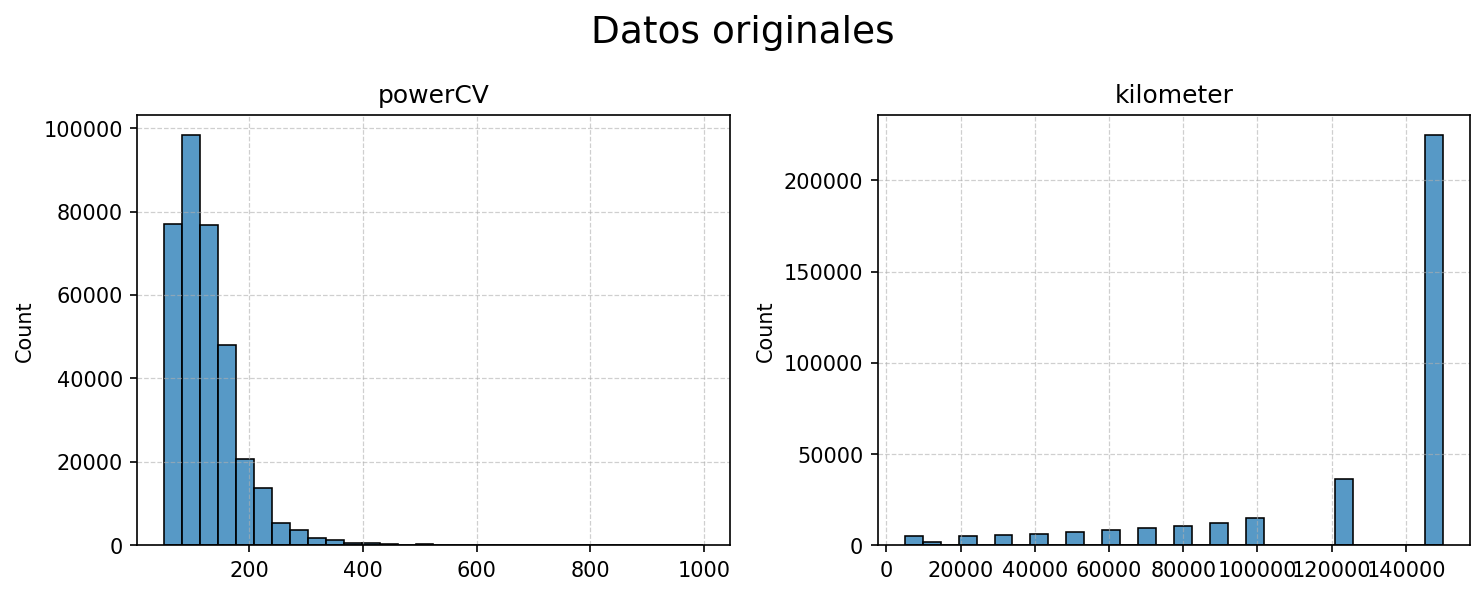

In [163]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10,4), dpi = 150)
plt.suptitle("Datos originales", fontsize = 18)
for i,col in enumerate(df_numeric.columns):
    axes[i].set_title(col)
    axes[i].grid(ls = "--", lw = 0.6, alpha = 0.6)
    sns.histplot(df_numeric[col], ax = axes[i], bins = 30)
    axes[i].set_xlabel('')
plt.tight_layout()
plt.show()

Y ahora las distribuciones estandarizadas.

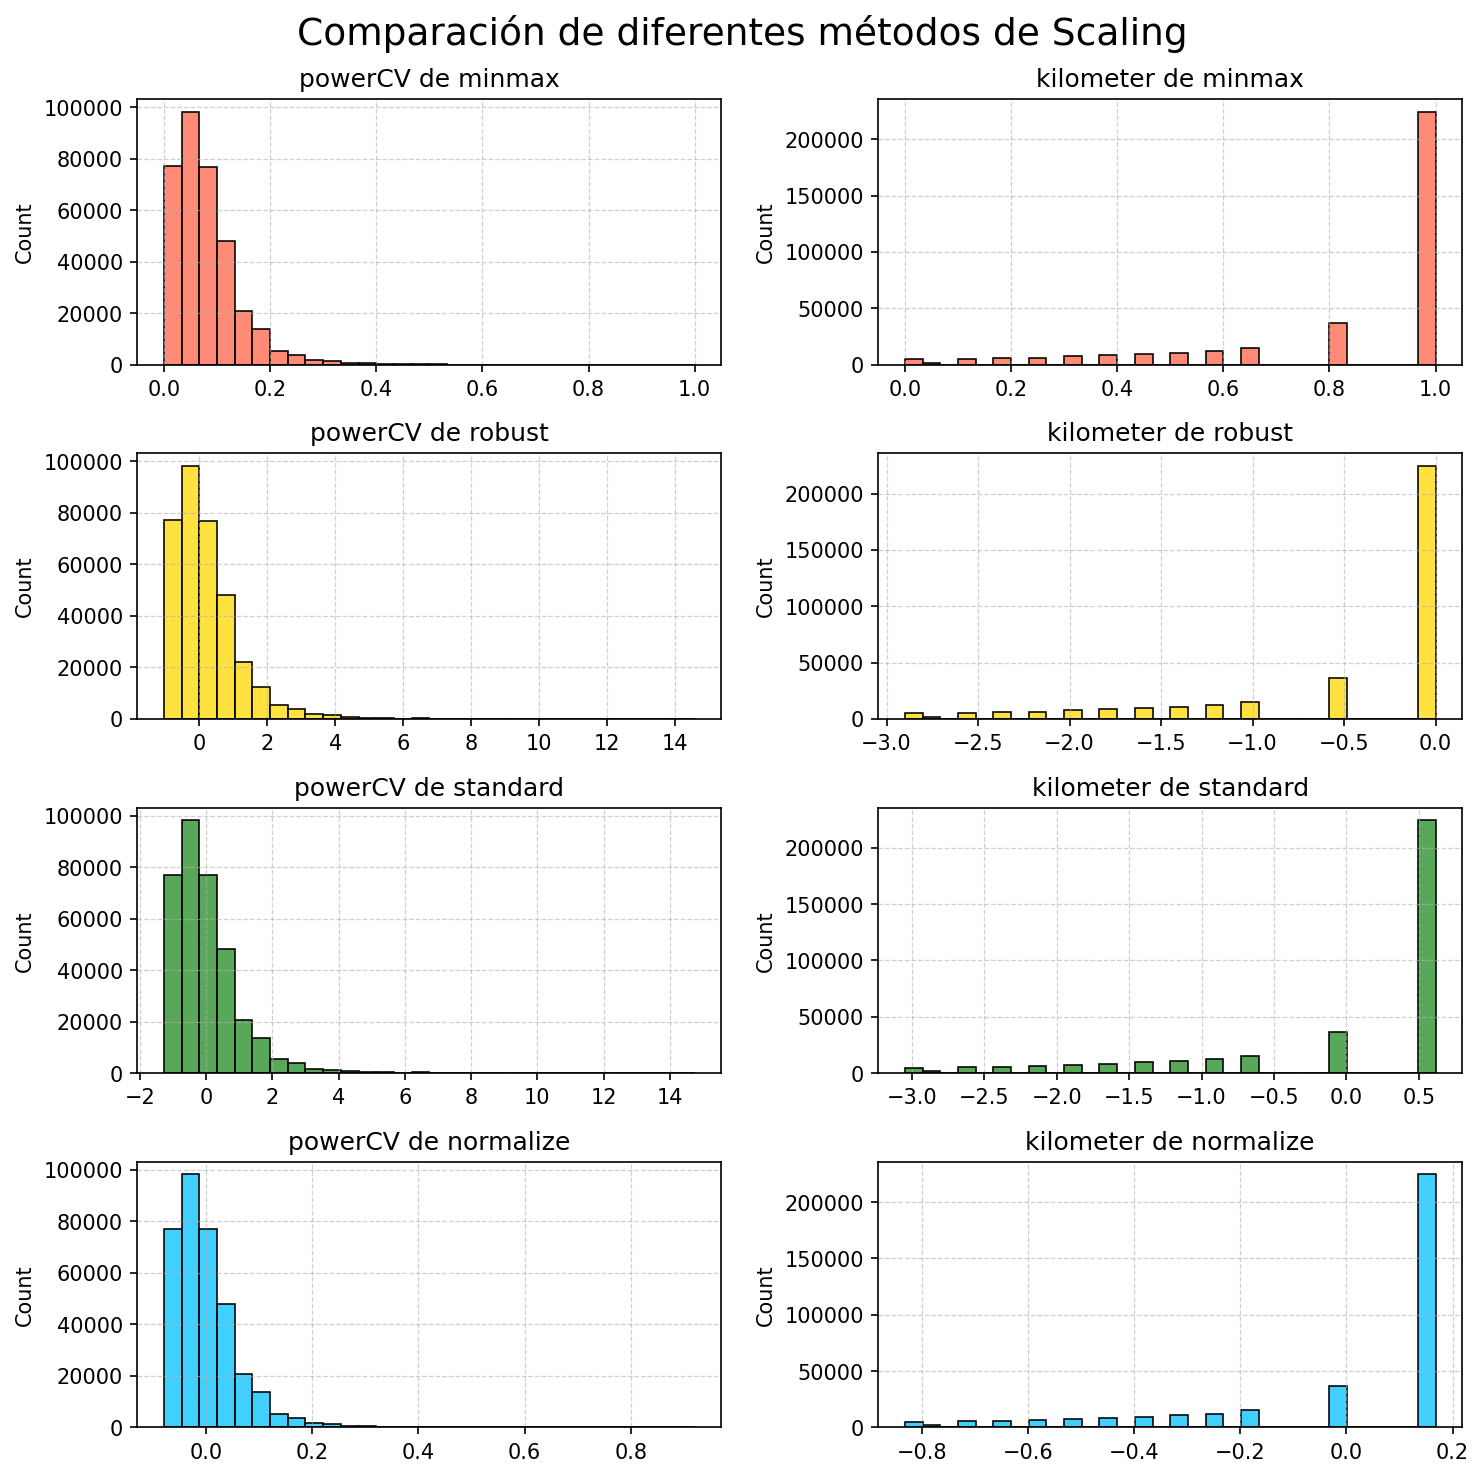

In [164]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize = (10,10), dpi = 150)

colors = ["tomato", "gold", "forestgreen", "deepskyblue"]

for i, col in enumerate(df_numeric.columns):
    # print(i)
    for j, data in enumerate(dict_df):
        axes[j,i].grid(ls = "--", lw = 0.6, alpha = 0.6)
        axes[j,i].set_title(f"{col} de {data}")
        sns.histplot(dict_df[data][col], ax = axes[j,i], bins = 30, color = colors[j])
        axes[j,i].set_xlabel('')
plt.suptitle("Comparación de diferentes métodos de Scaling", fontsize=18)
plt.tight_layout()
plt.show()

Vemos que todos los métodos de escalado mantienen la forma de las distribuciones. Esto es esperable, ya que realmente estamos aplicando una misma operación de escalado a cada uno de los valores de las columnas, por lo que solo afecta a la escala de los datos, no a la forma en la que se distribuyen.

A la hora de escoger qué método aplicar para estandarizar los datos, hemos de entender la naturaleza de éstos. Nuestros datos presentan una alta cantidad de outliers, por lo que el uso de un método como Robust o Standarization sería más recomendable que los otros dos, ya que no perderíamos información sobre la magnitud relativa de los atípicos.

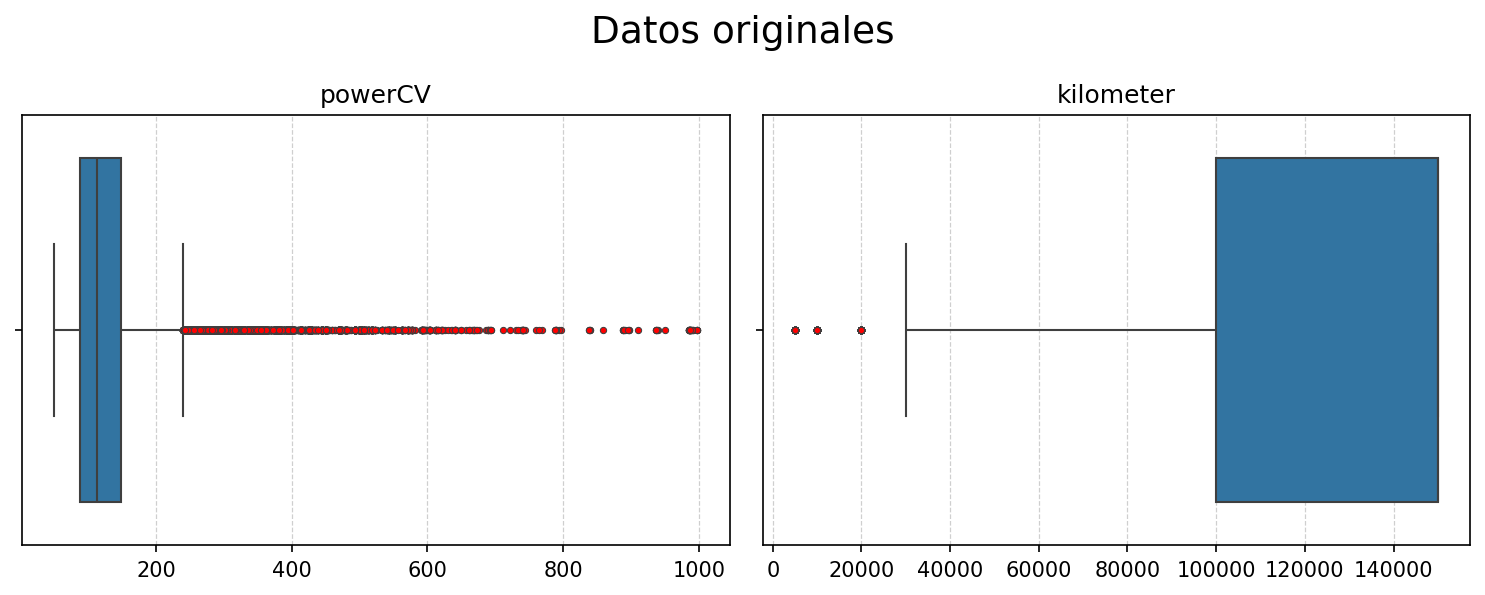

In [165]:
## Visualización de outliers
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10,4), dpi = 150)
plt.suptitle("Datos originales", fontsize = 18)
for i,col in enumerate(df_numeric.columns):
    axes[i].set_title(col)
    axes[i].grid(ls = "--", lw = 0.6, alpha = 0.6)
    sns.boxplot(df_numeric, x = col, ax = axes[i], 
                flierprops = {"marker" : ".", "markerfacecolor" : "red", "markeredgewidth" : 0.5})
    axes[i].set_xlabel('')
plt.tight_layout()
plt.show()


Vemos que aunque en el kilometraje no haya demasiados valores atípicos, hemos de ver nuestros datos al completo: los valores de powerCV presentan muchos outliers, los cuales podrían ser significativos debido a que existen coches con esas potencias, por lo que es importante tener en cuenta su contexto como atípico, por lo que será conveniente usar el método de ``RobustScaler``.

Nos quedaremos con estos datos, ahora tocará añadir las categóricas que le faltan:

In [167]:
robust_df = df.copy()
robust_df[df_numeric.columns] = numeric_robust

In [169]:
robust_df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480.0,test,unknown,Coche Moderno,manually,-0.382606,golf,0.0,unknown,petrol,volkswagen,unknown,2016-03-24,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300.0,test,coupe,Coche Contemporáneo,manually,1.218855,unknown,-0.5,may,diesel,audi,yes,2016-03-24,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800.0,test,suv,Coche Moderno,automatic,0.790609,grand,-0.5,august,diesel,jeep,unknown,2016-03-14,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500.0,test,small car,Coche Moderno,manually,-0.642369,golf,0.0,june,petrol,volkswagen,no,2016-03-17,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600.0,test,small car,Coche Moderno,manually,-0.741195,fabia,-1.2,july,diesel,skoda,no,2016-03-31,60437,2016-04-06 10:17:21


In [171]:
robust_df.to_csv("datos/robust.csv") ## Guardamos los datos en csv.